In [1]:
import numpy as np
import scipy
import scipy.signal
import matplotlib.pyplot as plt
import realtime_analysis as ra

In [2]:
import librosa
import librosa.display

In [3]:
plt.rcParams["figure.figsize"] = (14, 4)

sample timespan: 6.058684807256236
sample resolution: 4.5351473922902495e-05
frame resolution: 0.011609977324263039


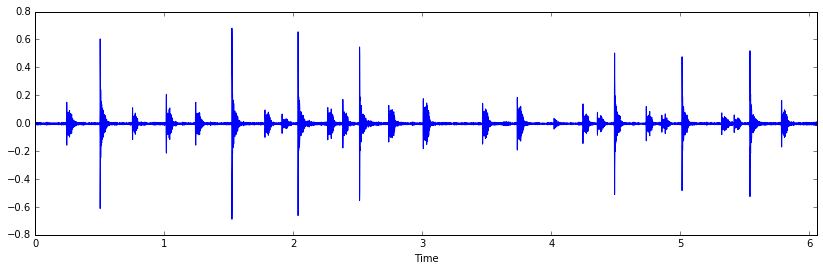

In [4]:
WIN_LENGTH = 2048
HOP_LENGTH = 2048//8

x, SR = librosa.load("test2.wav")
t = librosa.samples_to_time(np.arange(x.shape[0]), sr=SR)

print("sample timespan:", x.shape[0]/SR)
print("sample resolution:", 1/SR)
print("frame resolution:", HOP_LENGTH/SR)

librosa.display.waveplot(x, SR)


In [5]:
mel = ra.melspectrogram(SR, WIN_LENGTH, HOP_LENGTH)
next(mel)
s = []
for i in range(0, x.shape[0]-HOP_LENGTH, HOP_LENGTH):
    s.append(mel.send(x[i:i+HOP_LENGTH]))
s = np.stack(s).T


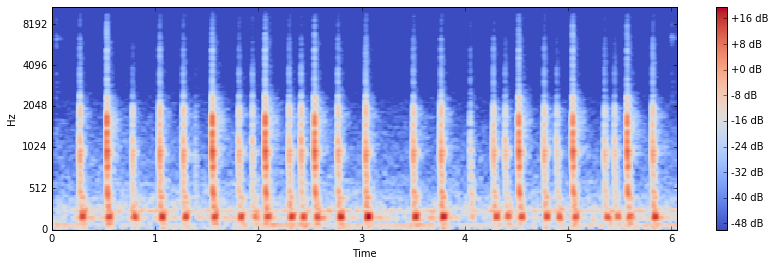

In [6]:
librosa.display.specshow(s, sr=SR, hop_length=HOP_LENGTH, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")

In [7]:
mel = ra.melspectrogram(SR, WIN_LENGTH, HOP_LENGTH)
env = ra.onset_strength()
dect = ra.onset_detect(SR, HOP_LENGTH, delta=1)
p = [next(dect)]
e = [next(env)]
p.append(dect.send(e[-1]))
e.append(env.send(next(mel)))
p.append(dect.send(e[-1]))
for i in range(0, x.shape[0]-HOP_LENGTH, HOP_LENGTH):
    e.append(env.send(mel.send(x[i:i+HOP_LENGTH])))
    p.append(dect.send(e[-1]))
    
e = np.array(e)
p = np.array(p)
t = np.arange(e.shape[0])*HOP_LENGTH/SR

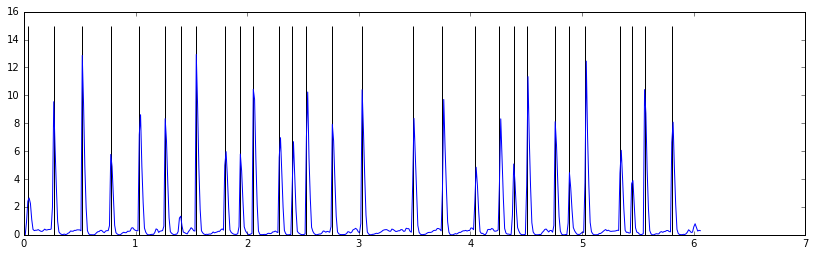

In [8]:
plt.plot(t, e)
sh = int(0.1*SR/HOP_LENGTH)
plt.vlines(t[:-sh][p[sh+1:]], ymin=0, ymax=15)